1, EDA

2, Feature engineering - Clean & Normalize

3, Split

4, Train

5, Evaluate

6, Tune

In [1]:
import pandas as pd
import numpy as np

In [2]:
da=pd.read_csv('kc_house_data.csv')

In [12]:
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [14]:
da.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
da.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [7]:
da.shape

(21613, 21)

In [8]:
import seaborn as sns

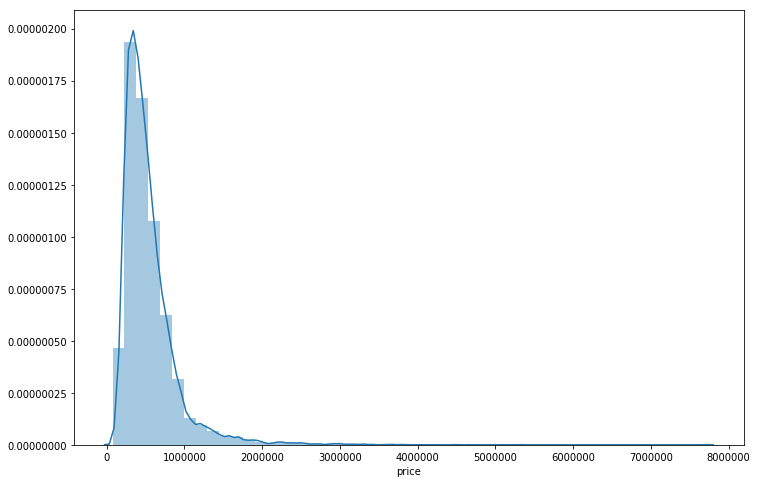

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(da['price'])

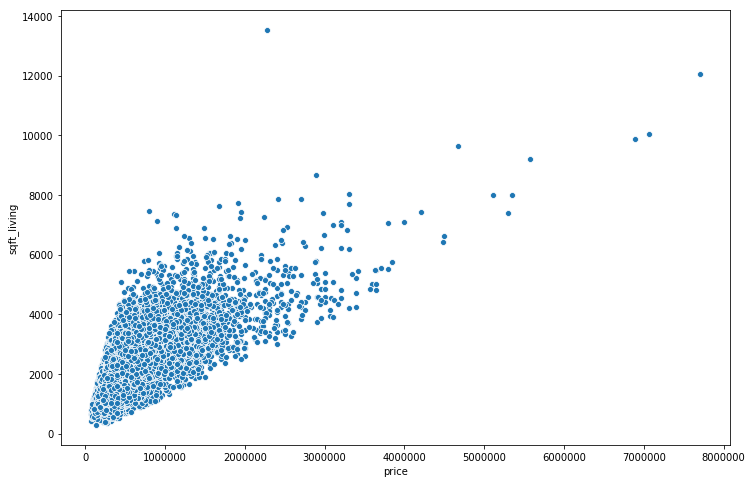

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_living',data=da)

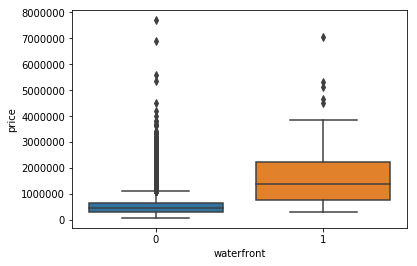

In [13]:
sns.boxplot(x='waterfront',y='price',data=da)

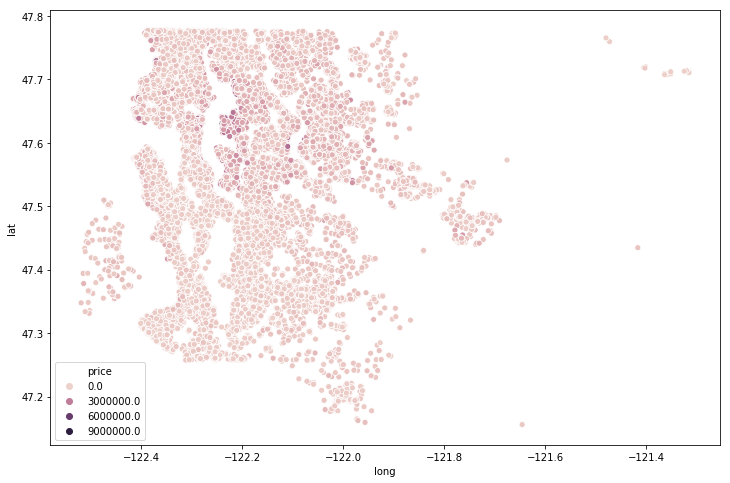

In [17]:
plt.figure(figsize=(10,7))
sns.scatterplot('long','lat',data=da,hue='price')# data=da,palette='hsv' #prism,plasma

In [20]:
import matplotlib.image as mpimg

In [38]:
mg=mpimg.imread('final.jpg')

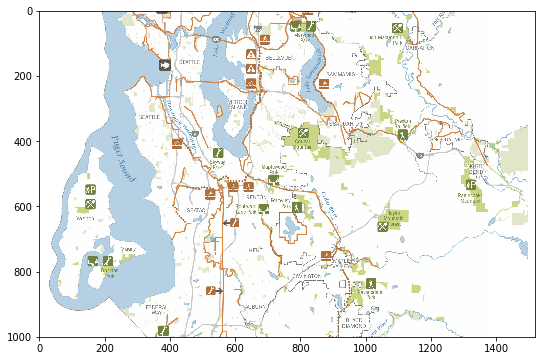

In [49]:
plt.figure(figsize=(10,7))
plt.imshow(mg[500:1500])

In [10]:
da['date']=pd.to_datetime(da['date'])
da['year']=da['date'].apply(lambda x:x.year)
da['month']=da['date'].apply(lambda x:x.month)

In [26]:
da.groupby(['year','month']).mean()['price']

year  month
2014  5        548080.276584
      6        558002.199541
      7        544788.764360
      8        536445.276804
      9        529253.821871
      10       539026.971778
      11       521961.009213
      12       524461.866757
2015  1        525870.889571
      2        507851.371200
      3        543977.187200
      4        561837.774989
      5        558126.811146
Name: price, dtype: float64

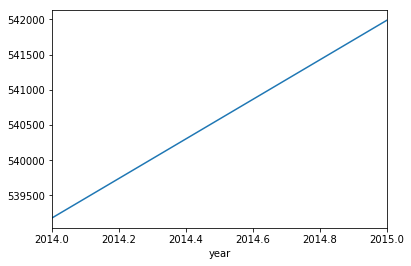

In [31]:
da.groupby('year').mean()['price'].plot()

In [11]:
da.drop(['id','date','zipcode'],axis=1,inplace=True) #,'yr_renovated','sqft_basement'

In [86]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
year             21613 non-null int64
month            21613 non-null int64
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [4]:
X = da.drop('price',axis=1)
y = da['price']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [44]:
from sklearn.preprocessing import StandardScaler #Normalize

In [50]:
scl=StandardScaler()

In [51]:
X_train=scl.fit_transform(X_train)
X_test=scl.transform(X_test)

In [89]:
X_train.shape

(16209, 19)

In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
lm=LinearRegression()

In [92]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
pred=lm.predict(X_test)

In [94]:
import numpy as np
#RMSE
np.mean((pred-y_test)**2)**.5

205499.13815564715

In [95]:
#MAPE
round(np.mean(np.abs((y_test-pred)/y_test))*100,2)

26.04

In [6]:
da['price_abv_avg']=(da['price']>=da['price'].mean()).astype(int)

In [12]:
X=da.drop(['price','price_abv_avg'],axis=1)
y=da['price_abv_avg']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=99)

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
#from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
#knn = KNeighborsClassifier(n_neighbors=5)
#knn.fit(X_train, y_train)
dtree.score(X_test, y_test)

0.8358623242042931

In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(max_features=10, random_state=1)
rfc1.fit(X_train, y_train)
rfc1.score(X_test, y_test)

0.9126572908956329

In [59]:
from xgboost.sklearn import XGBClassifier
params={
    'objective': 'binary:logistic',
    'max_depth': 5,
    'learning_rate': 0.5,
    'silent': 1.0, #True or False- print or not
    'n_estimators': 100
}

bst = XGBClassifier(**params).fit(X_train, y_train)
bst.predict(data=X_test)
bst.score(X_test, y_test)

0.9158031088082902

Automated parameter tuning

In [54]:
param_grid = {
    'objective': ['binary:logistic'],
    'max_depth': [2,4,6,8],
    'learning_rate':[0.1,0.15,0.25,0.5,0.75,0.95,1],
    'silent': [1.0], #True or False- print or not
    'n_estimators': [10,50,100,150,200]
}

grid = GridSearchCV(XGBClassifier(), param_grid, refit = True, verbose=0)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.9202442635085122

In [55]:
grid.best_params_

{'learning_rate': 0.25,
 'max_depth': 4,
 'n_estimators': 200,
 'objective': 'binary:logistic',
 'silent': 1.0}